In [73]:
import pandas as pd
import numpy as np
import seaborn as sns

In [93]:
orig=pd.read_csv("D:DataScience/Assignments/14-Random Forests/Fraud_check.csv")
orig

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [94]:
orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


### Creating new variable to identify the data set as "Risky" and "Good" based Taxable income < 30000

In [95]:
orig["validation"]="X"
orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
 6   validation       600 non-null    object
dtypes: int64(3), object(4)
memory usage: 32.9+ KB


In [96]:
orig.loc[orig["Taxable.Income"]>=30000,"validation"]="Good"
orig.loc[orig["Taxable.Income"]<=30000,"validation"]="Risky"

In [97]:
orig.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,validation
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


Good     476
Risky    124
Name: validation, dtype: int64


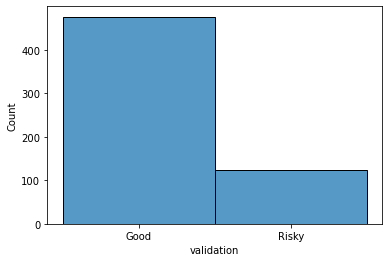

In [98]:
import seaborn as sns
sns.histplot(orig['validation'])
print(orig.validation.value_counts() )

In [99]:
##Droping the Taxable income variable
orig.drop(["Taxable.Income"],axis=1,inplace=True)

### Convert categorical to numerical

In [101]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
orig['Undergrad']= label_encoder.fit_transform(orig['Undergrad'])
orig['Marital.Status']= label_encoder.fit_transform(orig['Marital.Status']) 
orig['Urban']= label_encoder.fit_transform(orig['Urban'])
orig['validation']= label_encoder.fit_transform(orig['validation']) 
orig.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,validation
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [102]:
x=orig.iloc[:,0:5]
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [109]:
y=orig.iloc[:,5]
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: validation, Length: 600, dtype: int32

In [110]:
X = x.values
X

array([[     0,      2,  50047,     10,      1],
       [     1,      0, 134075,     18,      1],
       [     0,      1, 160205,     30,      1],
       ...,
       [     0,      0, 154058,      0,      1],
       [     1,      1, 180083,     17,      0],
       [     0,      0, 158137,     16,      0]], dtype=int64)

In [111]:
Y=y.values
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

### Standardize 

In [112]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X=scaler.fit_transform(X)

### Train and Test Data

In [113]:
# Splitting data into training and testing data set
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=40)
print(x_train.shape," ",x_test.shape," ",y_train.shape," ",y_test.shape)

(480, 5)   (120, 5)   (480,)   (120,)


### Parameter optimization with Grid Search

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid={'n_estimators': n_estimators, 
            'max_features': max_features,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
            'bootstrap': bootstrap 
           }
model=RandomForestClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100]})

In [119]:
print("Best Parmeters", grid.best_params_)
print("Best Score", grid.best_score_)
print("Best Estimator", grid.best_estimator_)

Best Parmeters {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best Score 0.8
Best Estimator RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10)


### Build model with the above parameters

In [130]:
model=RandomForestClassifier(max_features= 'auto', max_depth=10,
                                  min_samples_leaf= 4, min_samples_split= 10,
                                  n_estimators= 100)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10)

In [129]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,model.predict(x_test))

0.7666666666666667

In [131]:
ytest_pred=model.predict(x_test)
print("Test Results",'\n',classification_report(y_test,ytest_pred))

Test Results 
               precision    recall  f1-score   support

           0       0.77      1.00      0.87        92
           1       0.00      0.00      0.00        28

    accuracy                           0.77       120
   macro avg       0.38      0.50      0.43       120
weighted avg       0.59      0.77      0.67       120



C:\Users\jeysu_000\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
